In [ ]:
import pandas as pd
from datetime import datetime

In [ ]:
df = pd.read_csv('./taxi_rides.csv')
df.head()

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820


In [ ]:
df['timestamp']=pd.to_datetime(df['timestamp'])

In [ ]:
df=df.set_index('timestamp').resample("H").mean().reset_index()
df.head()

,timestamp,value
0,2014-07-01 00:00:00,9485.5
1,2014-07-01 01:00:00,5433.0
2,2014-07-01 02:00:00,3346.5
3,2014-07-01 03:00:00,2216.5
4,2014-07-01 04:00:00,2189.5


In [ ]:
df['hour']=df.timestamp.dt.hour
df['weekday']=pd.Categorical(df.timestamp.dt.strftime('%A'), categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)
df.head()

,timestamp,value,hour,weekday
0,2014-07-01 00:00:00,9485.5,0,Tuesday
1,2014-07-01 01:00:00,5433.0,1,Tuesday
2,2014-07-01 02:00:00,3346.5,2,Tuesday
3,2014-07-01 03:00:00,2216.5,3,Tuesday
4,2014-07-01 04:00:00,2189.5,4,Tuesday


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

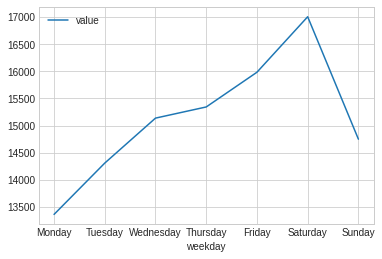

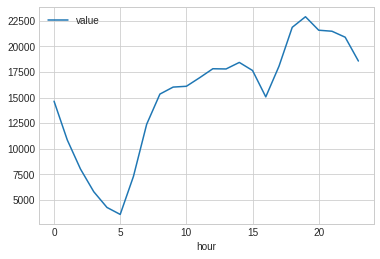

In [ ]:
df[['value','weekday']].groupby('weekday').mean().plot()
df[['value','hour']].groupby('hour').mean().plot()

In [ ]:
import plotly.express as px

fig = px.line(df.reset_index(), x='timestamp', y='value', title='TAXI RIDES')
fig.update_xaxes(
    rangeslider_visible=True,
)
fig.show()

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
model =  IsolationForest(contamination=0.004)
model.fit(df[['value']])
df['outliers']=pd.Series(model.predict(df[['value']])).apply(lambda x: 'yes' if (x == -1) else 'no' )

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



In [ ]:
df.query('outliers=="yes"')

,timestamp,value,hour,weekday,outliers
1631,2014-09-06 23:00:00,29418.5,23,Saturday,yes
2135,2014-09-27 23:00:00,28024.5,23,Saturday,yes
2639,2014-10-18 23:00:00,28253.5,23,Saturday,yes
2971,2014-11-01 19:00:00,27912.0,19,Saturday,yes
2977,2014-11-02 01:00:00,37204.5,1,Sunday,yes
3143,2014-11-08 23:00:00,27926.0,23,Saturday,yes
3311,2014-11-15 23:00:00,27713.0,23,Saturday,yes
3479,2014-11-22 23:00:00,28299.0,23,Saturday,yes
4417,2015-01-01 01:00:00,29292.0,1,Thursday,yes
4655,2015-01-10 23:00:00,28351.0,23,Saturday,yes


In [ ]:
fig = px.scatter(df.reset_index(), x='timestamp', y='value', color='outliers', hover_data=['weekday'], title='TAXI DRIVES')
fig.update_xaxes(
    rangeslider_visible=True,
)
fig.show()